C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1756\4239281924.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Access Type", data=access_sorted, palette="viridis")


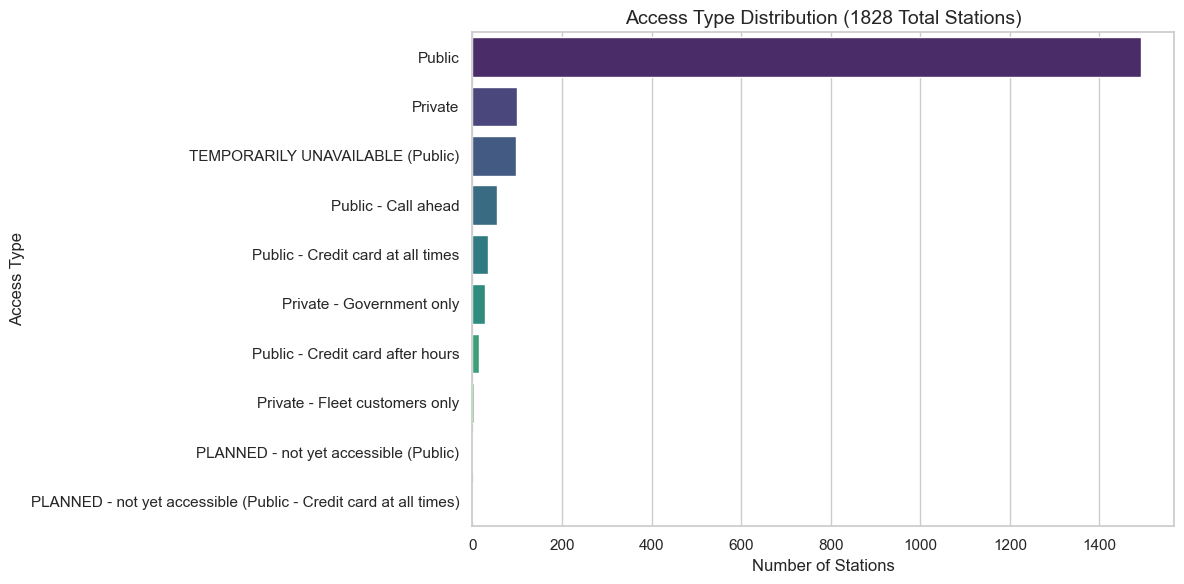

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1756\4239281924.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fuel Type", y="Count", data=fuel_sorted, palette="rocket")


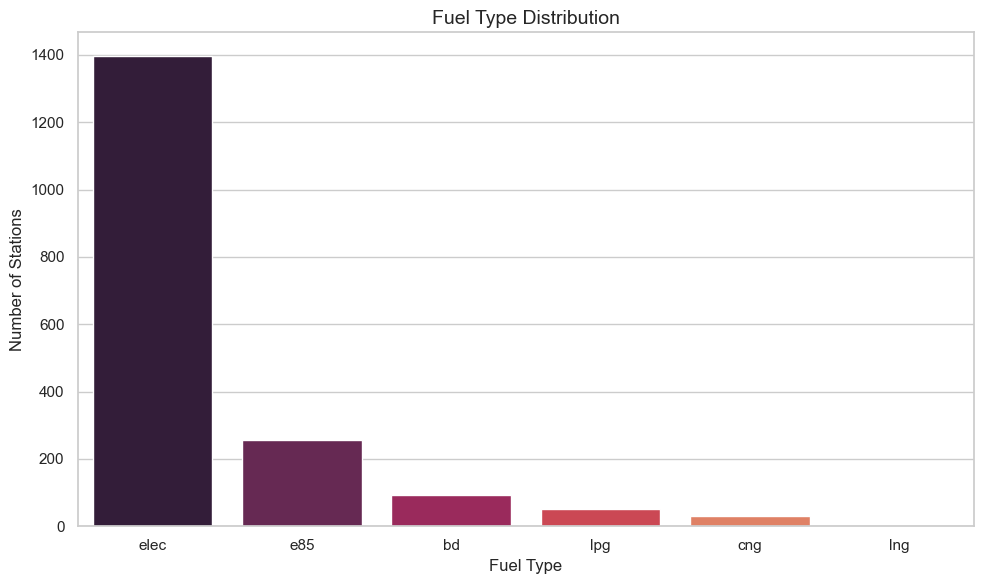

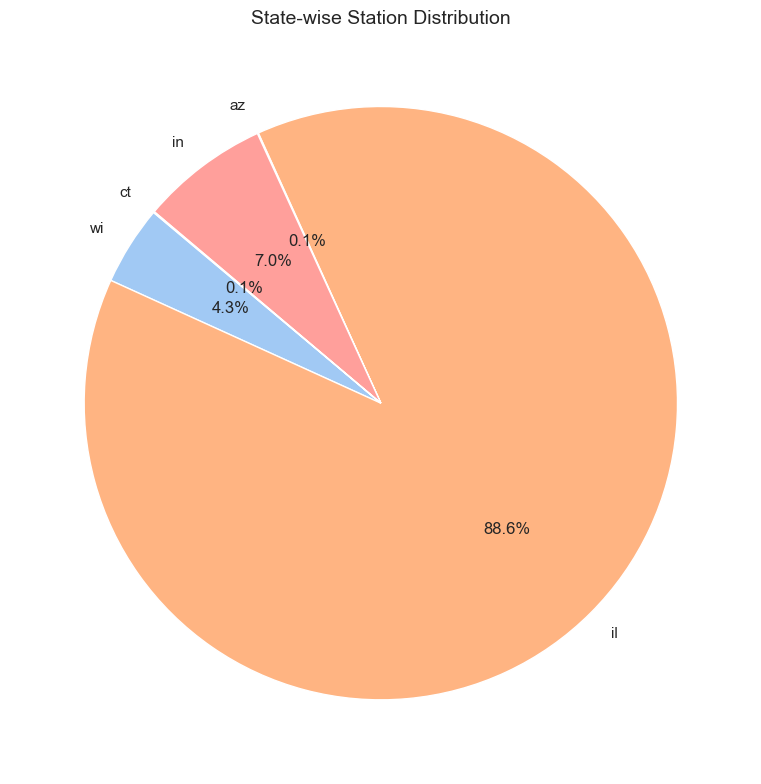

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

with open("fuel_summary.json", "r") as f:
    data = json.load(f)

total_stations = data["total_stations"]

access_df = pd.DataFrame(list(data["access_type_counts"].items()), columns=["Access Type", "Count"])
fuel_df = pd.DataFrame(list(data["fuel_type_counts"].items()), columns=["Fuel Type", "Count"])
state_df = pd.DataFrame(list(data["state_counts"].items()), columns=["State", "Count"])

plt.figure(figsize=(12, 6))
access_sorted = access_df.sort_values("Count", ascending=False)
sns.barplot(x="Count", y="Access Type", data=access_sorted, palette="viridis")
plt.title(f"Access Type Distribution ({total_stations} Total Stations)", fontsize=14)
plt.xlabel("Number of Stations")
plt.ylabel("Access Type")
plt.tight_layout()
plt.savefig("access_type_distribution.png")
plt.show()

plt.figure(figsize=(10, 6))
fuel_sorted = fuel_df.sort_values("Count", ascending=False)
sns.barplot(x="Fuel Type", y="Count", data=fuel_sorted, palette="rocket")
plt.title("Fuel Type Distribution", fontsize=14)
plt.ylabel("Number of Stations")
plt.xlabel("Fuel Type")
plt.tight_layout()
plt.savefig("fuel_type_distribution.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(state_df["Count"], labels=state_df["State"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("State-wise Station Distribution", fontsize=14)
plt.tight_layout()
plt.savefig("state_distribution_pie.png")
plt.show()

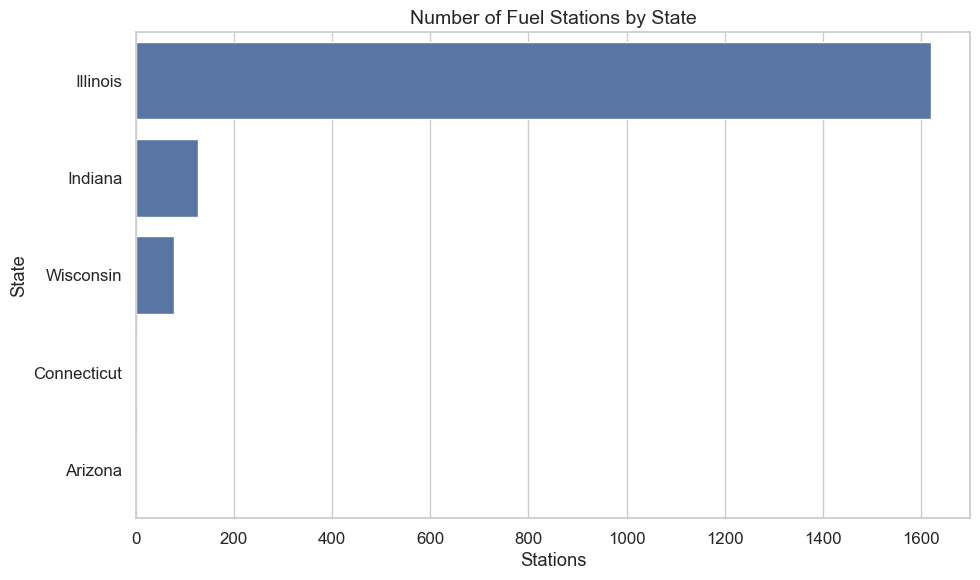

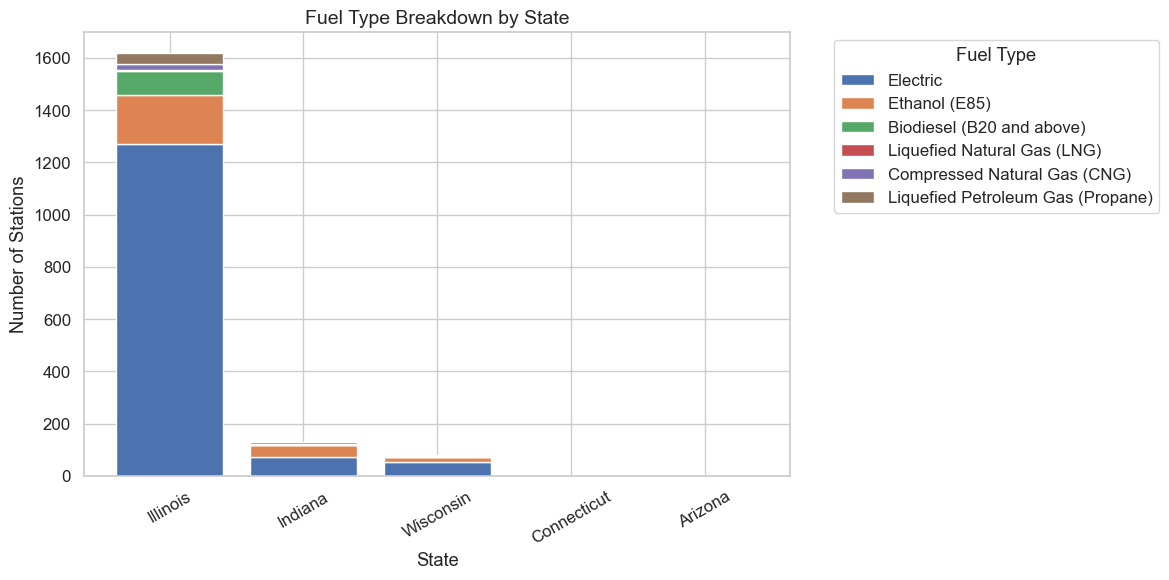

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

# State and fuel mappings
state_name_map = {
    "az": "Arizona",
    "il": "Illinois",
    "in": "Indiana",
    "wi": "Wisconsin",
    "ct": "Connecticut"
}

fuel_name_map = {
    "e85": "Ethanol (E85)",
    "bd": "Biodiesel (B20 and above)",
    "lng": "Liquefied Natural Gas (LNG)",
    "cng": "Compressed Natural Gas (CNG)",
    "lpg": "Liquefied Petroleum Gas (Propane)",
    "elec": "Electric"
}

# Load JSON
with open("state_analysis.json", "r") as f:
    data = json.load(f)

# Prepare data
states = []
station_counts = []
fuel_breakdown = {}

for abbr, state_data in data.items():
    full_state = state_name_map.get(abbr, abbr.upper())
    states.append(full_state)
    station_counts.append(state_data["station_count"])
    
    for fuel, count in state_data["fuel_type_counts"].items():
        full_fuel = fuel_name_map.get(fuel, fuel)
        if full_fuel not in fuel_breakdown:
            fuel_breakdown[full_fuel] = []
        fuel_breakdown[full_fuel].append(count)
    
    # Fill in missing fuels with 0
    for fuel in fuel_name_map.values():
        if fuel not in fuel_breakdown:
            fuel_breakdown[fuel] = [0] * (len(states) - 1)
        if len(fuel_breakdown[fuel]) < len(states):
            fuel_breakdown[fuel].append(0)

# Create DataFrames
station_df = pd.DataFrame({"State": states, "Station Count": station_counts})
fuel_df = pd.DataFrame(fuel_breakdown, index=states)

# Plot 1: Station count per state
plt.figure(figsize=(10, 6))
sns.barplot(x="Station Count", y="State", data=station_df.sort_values("Station Count", ascending=False))
plt.title("Number of Fuel Stations by State", fontsize=14)
plt.xlabel("Stations")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("stations_by_state.png")
plt.show()

# Plot 2: Stacked bar chart of fuel types per state
fuel_df = fuel_df.fillna(0)
fuel_df_sorted = fuel_df.loc[station_df.sort_values("Station Count", ascending=False)["State"]]

plt.figure(figsize=(12, 6))
bottom = [0] * len(fuel_df_sorted)

for column in fuel_df_sorted.columns:
    plt.bar(fuel_df_sorted.index, fuel_df_sorted[column], bottom=bottom, label=column)
    bottom = [i + j for i, j in zip(bottom, fuel_df_sorted[column])]

plt.title("Fuel Type Breakdown by State", fontsize=14)
plt.ylabel("Number of Stations")
plt.xlabel("State")
plt.xticks(rotation=30)
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("fuel_breakdown_by_state.png")
plt.show()


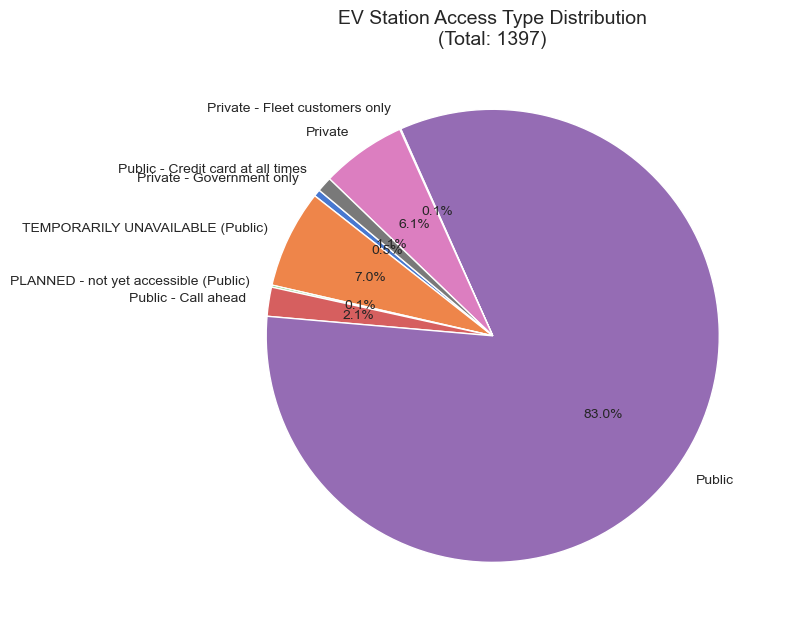

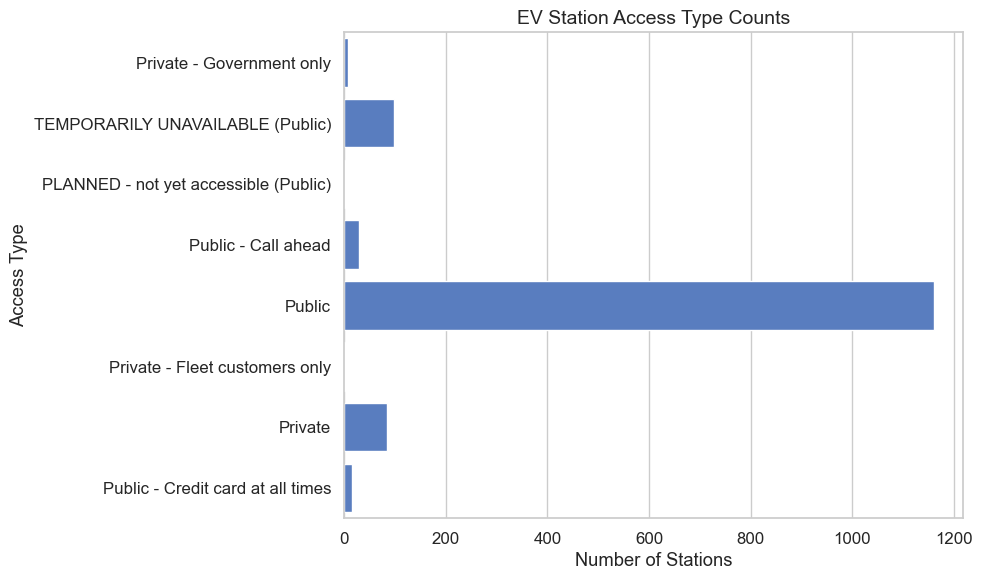

In [7]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load data
with open("ev_analysis.json", "r") as f:
    data = json.load(f)

access_counts = data["ev_access_type_counts"]
total_ev_stations = data["total_ev_stations"]

# Convert to sorted list
access_labels = list(access_counts.keys())
access_values = list(access_counts.values())

# --- Plot 1: Pie Chart ---
plt.figure(figsize=(8, 8))
plt.pie(
    access_values,
    labels=access_labels,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"fontsize": 10}
)
plt.title(f"EV Station Access Type Distribution\n(Total: {total_ev_stations})", fontsize=14)
plt.tight_layout()
plt.savefig("ev_access_pie.png")
plt.show()

# --- Plot 2: Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x=access_values, y=access_labels, orient="h")
plt.title("EV Station Access Type Counts", fontsize=14)
plt.xlabel("Number of Stations")
plt.ylabel("Access Type")
plt.tight_layout()
plt.savefig("ev_access_bar.png")
plt.show()
